# Exploratory Data Analysis (EDA) on Traffic Volume Dataset

This notebook performs an exploratory data analysis (EDA) on the dataset. The goal is to uncover patterns and insights related to traffic volume based on various features such as time, weather conditions, and holidays.

1. Loading Libraries

In [2]:
# Loading Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

2. Loading Data

In [3]:
# Loading data
file_path = '/Users/nas/Documents/MRP/dataset/Metro_Interstate_Traffic_Volume.csv'
traffic_data = pd.read_csv(file_path)

3. Data Overview

In [4]:
# Data Overview
traffic_data.info()

# Summary statistics for numerical columns
summary_statistics = traffic_data.describe()
print("\nSummary Statistics:\n", summary_statistics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB

Summary Statistics:
                temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     

4. Missing value ANalysis

In [5]:
# Check for missing values
missing_values = traffic_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


5. Feture extraction

In [6]:
# Extracting date-related features
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data['day_of_week'] = traffic_data['date_time'].dt.dayofweek
traffic_data['week'] = traffic_data['date_time'].dt.isocalendar().week
traffic_data['month'] = traffic_data['date_time'].dt.month
traffic_data['year'] = traffic_data['date_time'].dt.year

## Converting 'date_time' to Datetime

# Convert 'date_time' to datetime
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

# Displaying the updated dataframe
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,week,month,year
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,40,10,2012
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,40,10,2012
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,40,10,2012
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,40,10,2012
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,40,10,2012


6. Visualizations

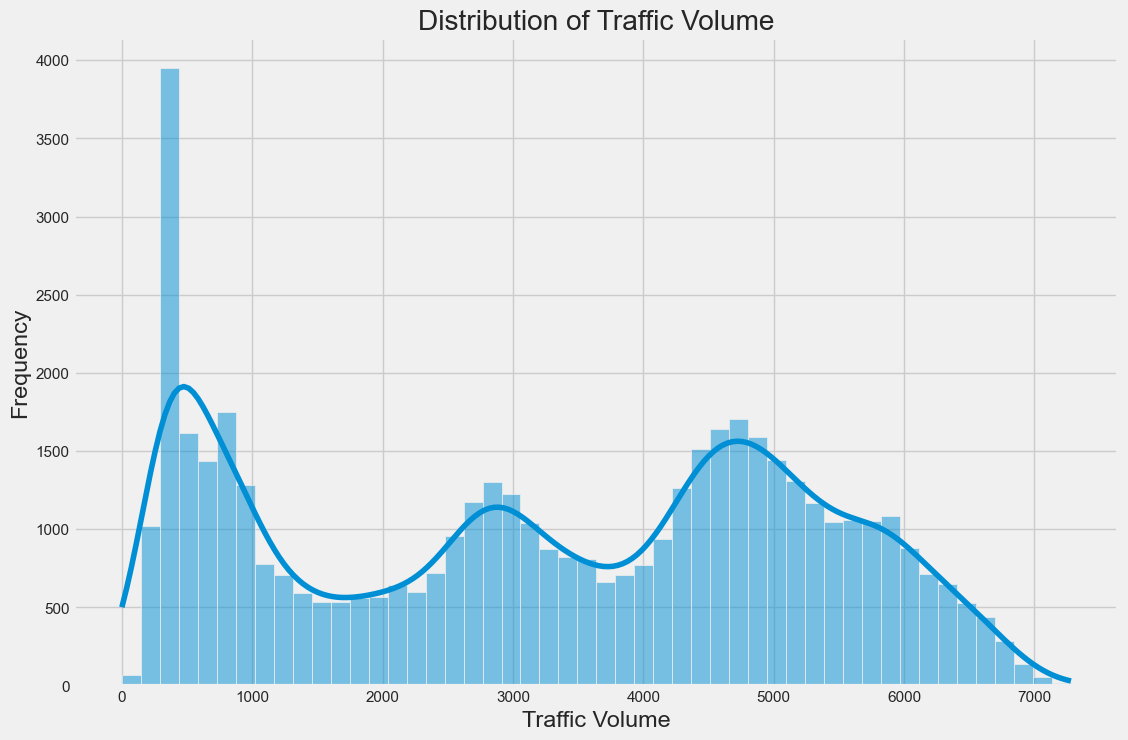

In [7]:
# Plot distribution of traffic volume
plt.figure(figsize=(12, 8))
sns.histplot(traffic_data['traffic_volume'], bins=50, kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

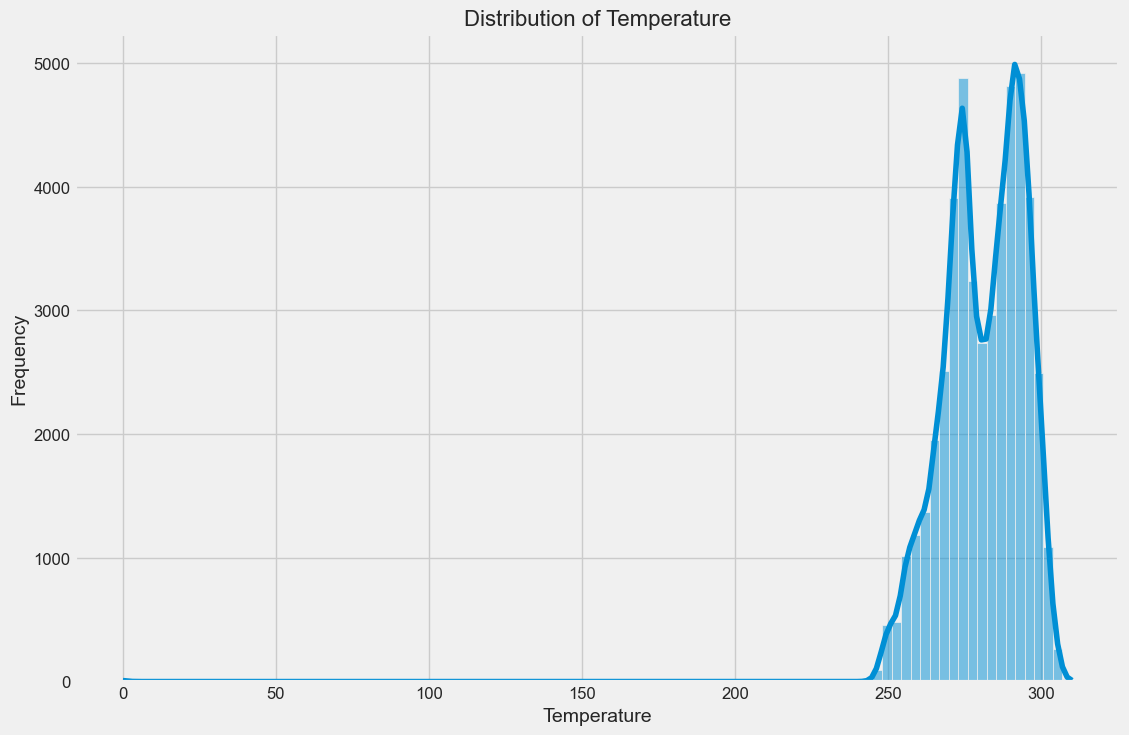

In [8]:
# Plot distribution of temperature
plt.figure(figsize=(12, 8), dpi=100)
sns.histplot(traffic_data['temp'], bins=100, kde=True)
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

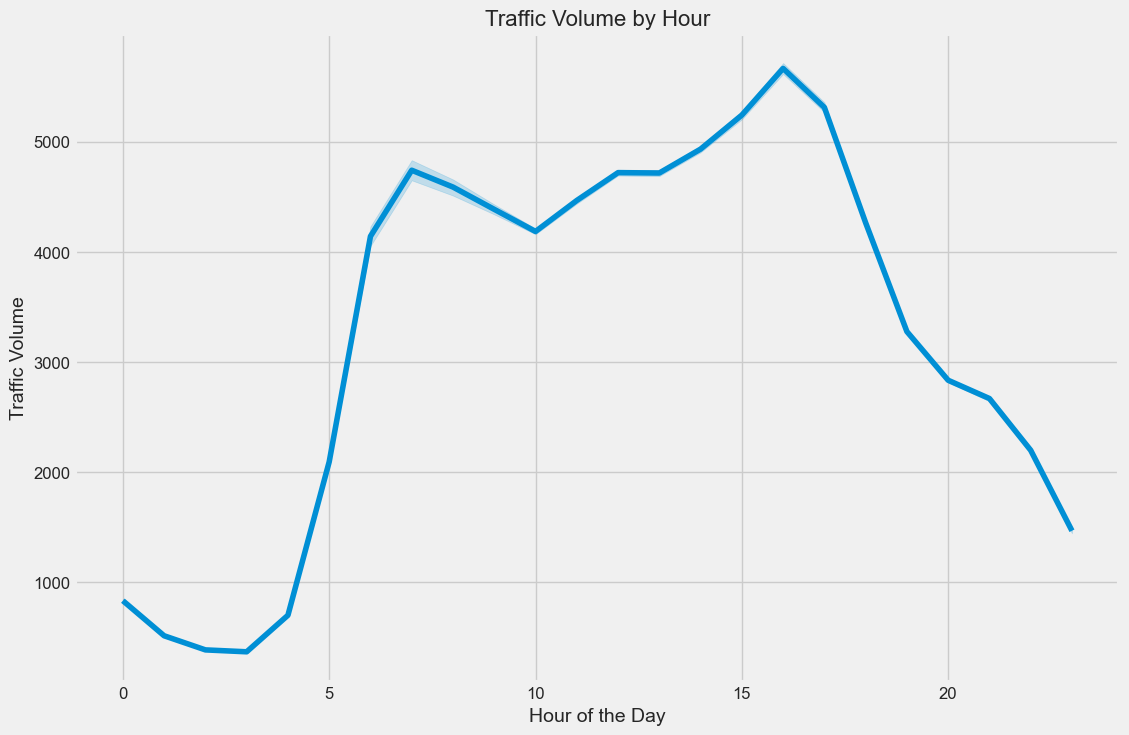

In [9]:
# Plot traffic volume by hour
plt.figure(figsize=(12, 8), dpi=100)
sns.lineplot(data=traffic_data, x='hour', y='traffic_volume')
plt.title('Traffic Volume by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

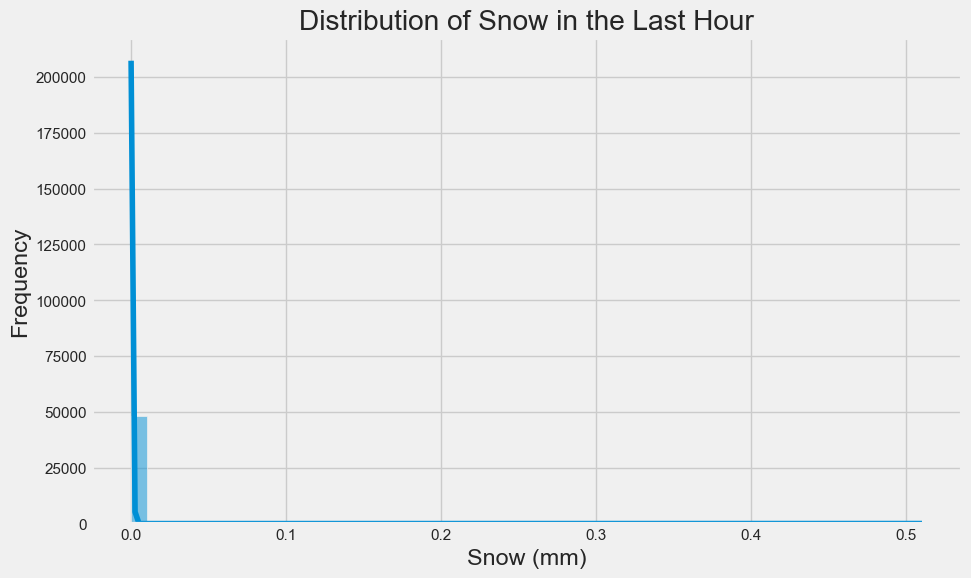

In [10]:
# Plot distribution of snow in the last hour
plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['snow_1h'], bins=50, kde=True)
plt.title('Distribution of Snow in the Last Hour')
plt.xlabel('Snow (mm)')
plt.ylabel('Frequency')
plt.show()

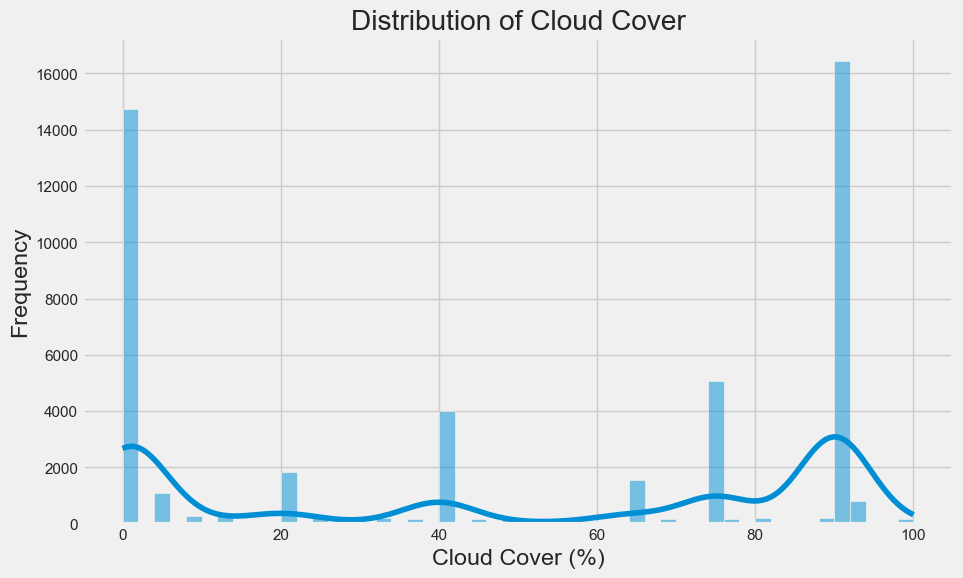

In [11]:
# Plot distribution of cloud cover
plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['clouds_all'], bins=50, kde=True)
plt.title('Distribution of Cloud Cover')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Frequency')
plt.show()

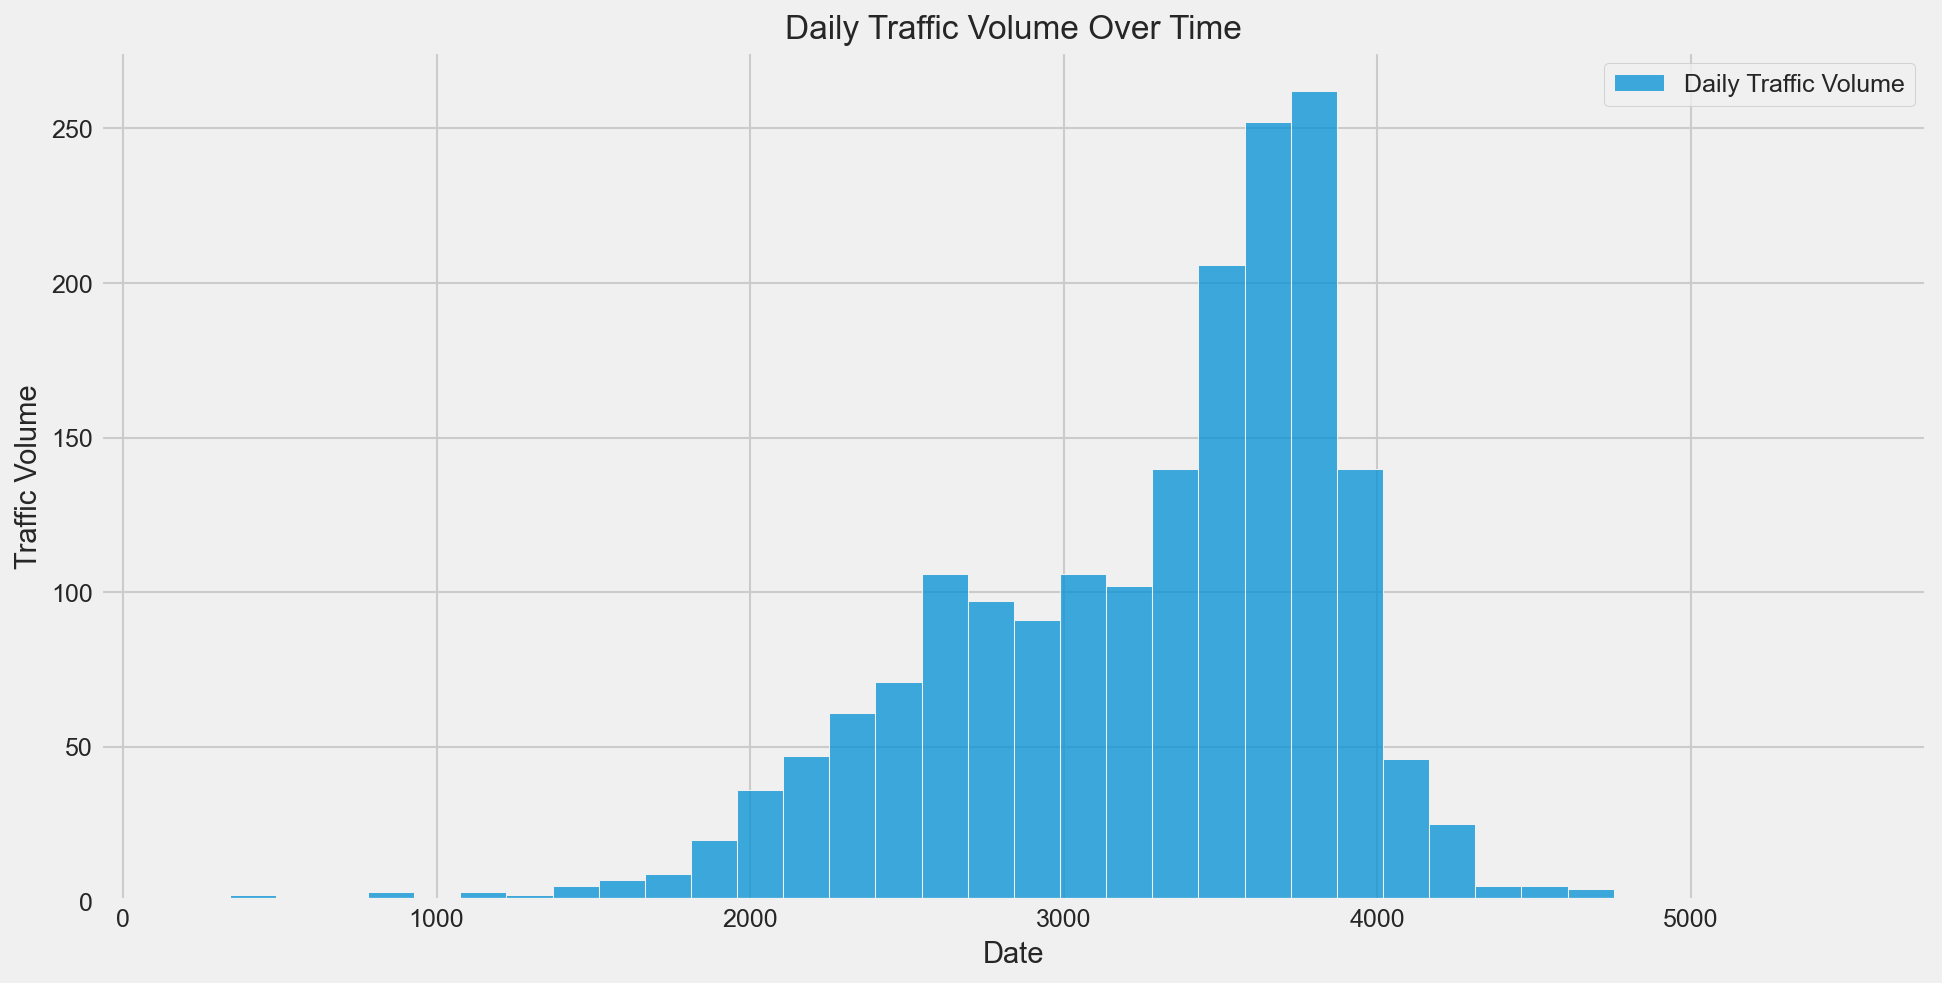

In [12]:
# Set date_time as the index for time series analysis
traffic_data.set_index('date_time', inplace=True)

# Resample traffic volume to daily mean
daily_traffic_volume = traffic_data['traffic_volume'].resample('D').mean()

# Plot daily traffic volume over time using lineplot
plt.figure(figsize=(14, 7), dpi=150)
sns.histplot(data=daily_traffic_volume, label='Daily Traffic Volume')
plt.title('Daily Traffic Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Weather Impact Analysis
### Correlation Matrix

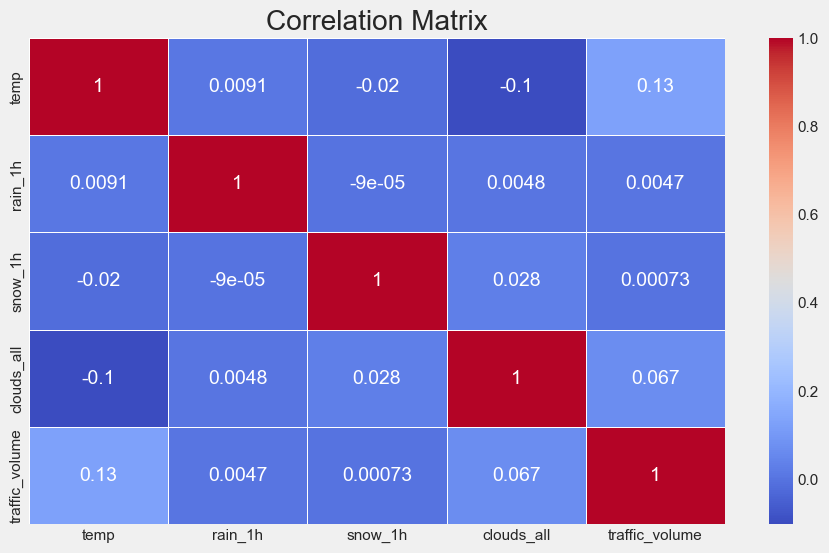

In [13]:
# Calculate correlation matrix
correlation_matrix = traffic_data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Outlier:
                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2016-07-11 17:00:00     NaN  302.11   9831.3      0.0          75   

                    weather_main weather_description  traffic_volume  hour  \
date_time                                                                    
2016-07-11 17:00:00         Rain     very heavy rain            5535    17   

                     day_of_week  week  month  year is_holiday holiday_label  
date_time                                                                     
2016-07-11 17:00:00            0    28      7  2016    Holiday           NaN  


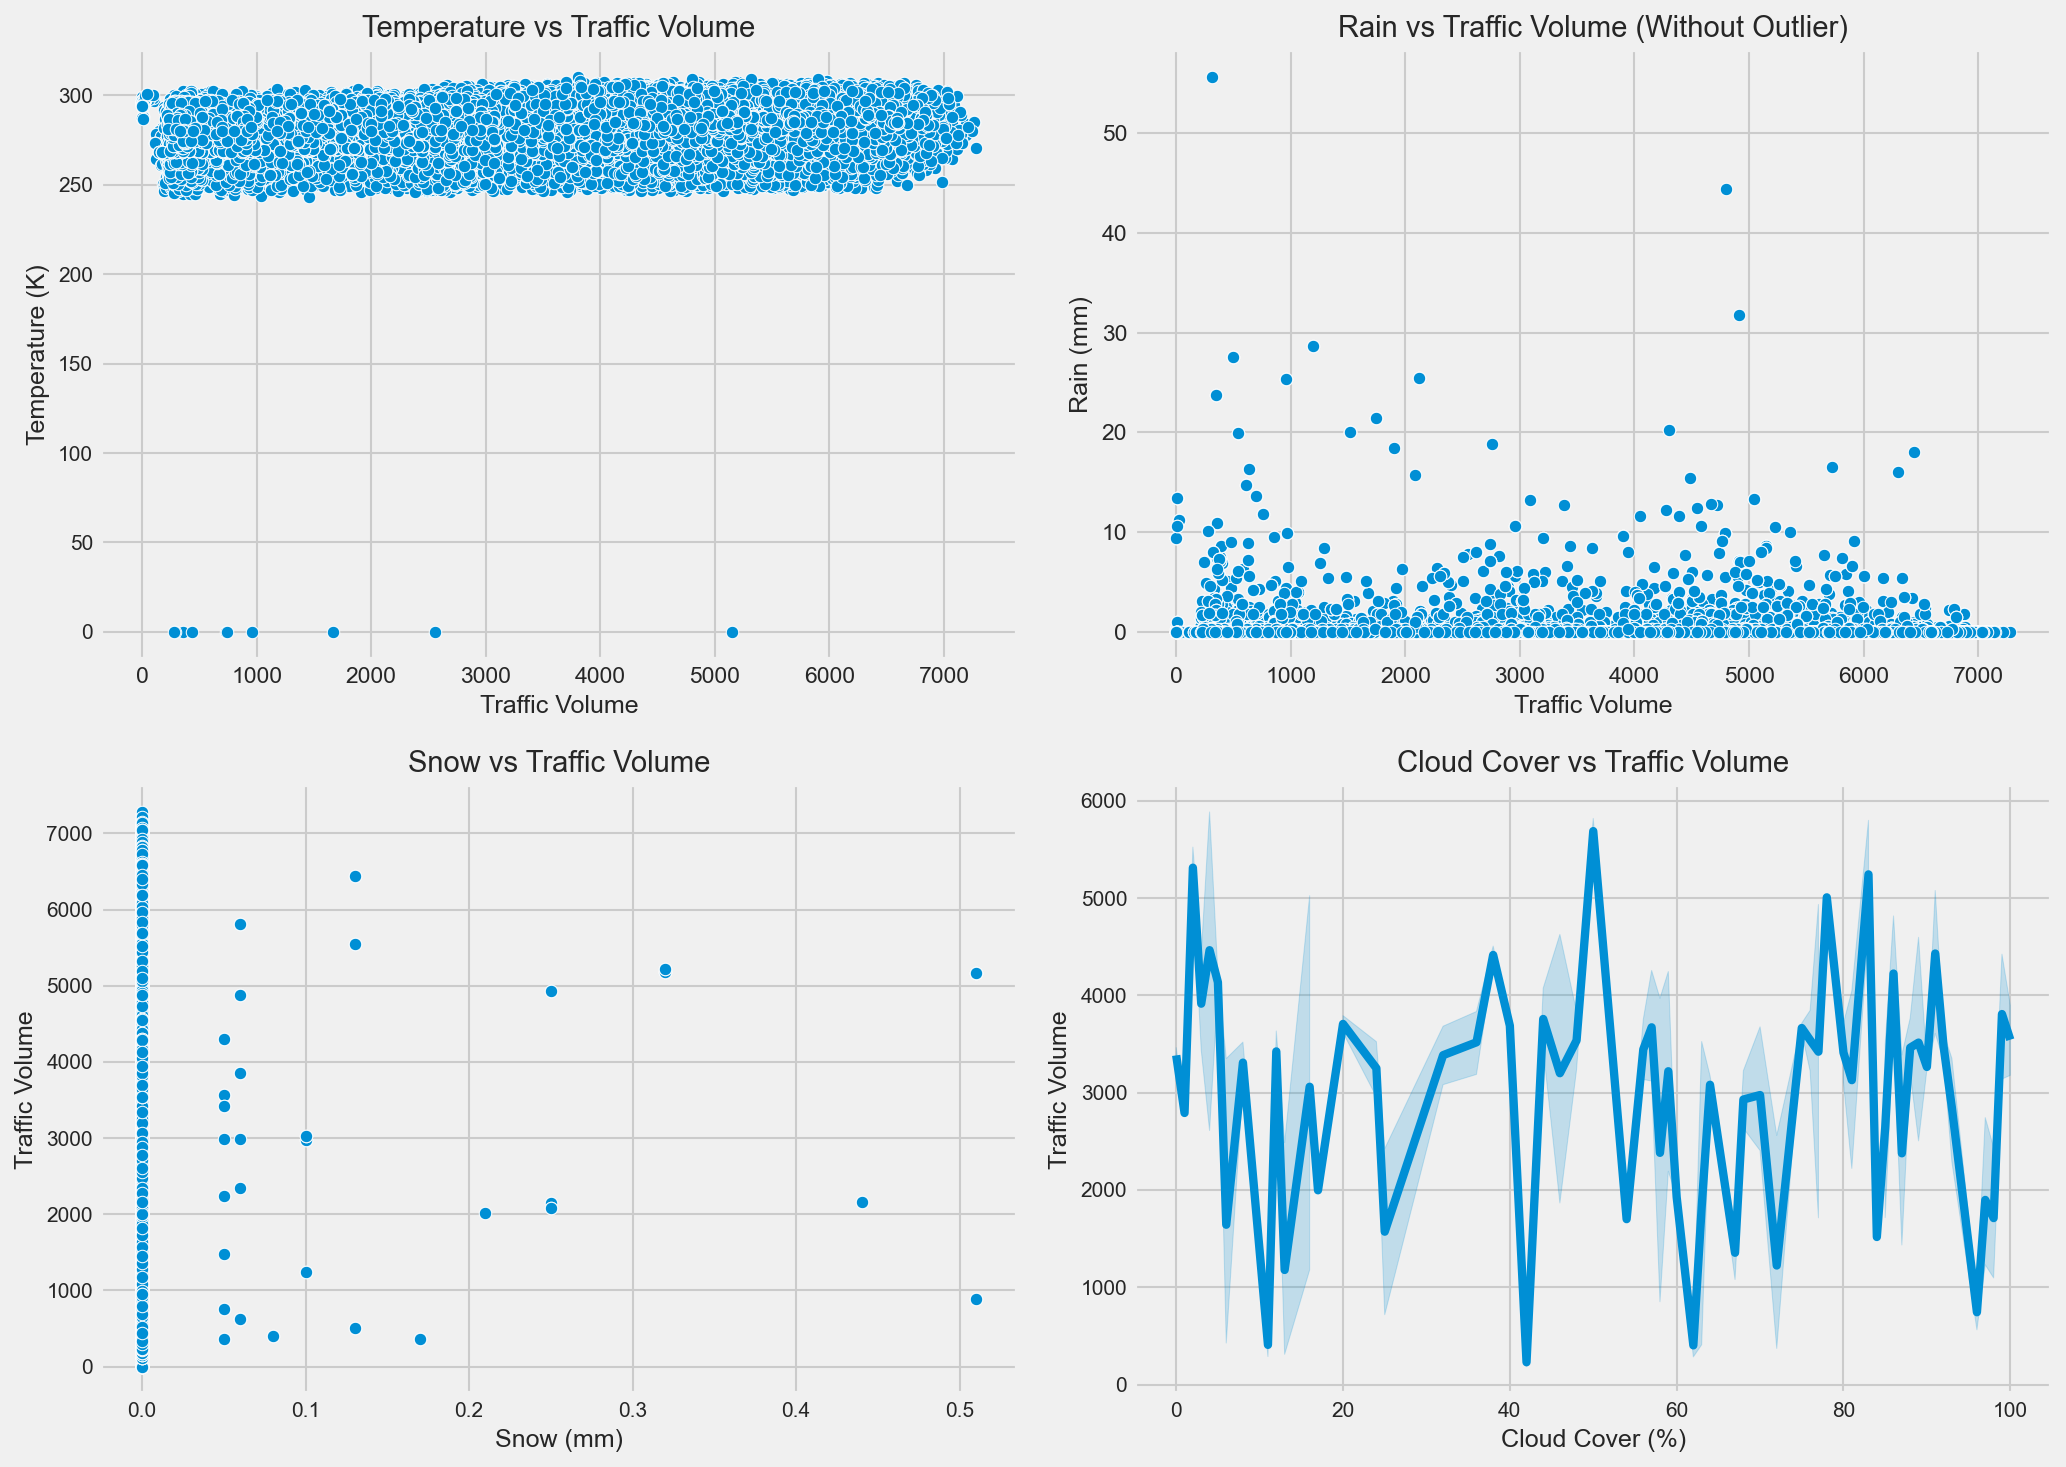

In [37]:
# Identify the outlier
outlier = traffic_data[traffic_data['rain_1h'] > 1000]  # Assuming rain values greater than 1000 are outliers
print("Outlier:")
print(outlier)

# Remove the outlier
traffic_data_cleaned = traffic_data[traffic_data['rain_1h'] <= 1000]
# Scatter plots to visualize relationships
plt.figure(figsize=(14, 10), dpi=150)

# Temperature vs Traffic Volume
plt.subplot(2, 2, 1)
sns.scatterplot(y=traffic_data['temp'], x=traffic_data['traffic_volume'])
plt.title('Temperature vs Traffic Volume', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=12)
plt.xlabel('Traffic Volume', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True)

# Rain vs Traffic Volume
plt.subplot(2, 2, 2)
sns.scatterplot(y=traffic_data_cleaned['rain_1h'], x=traffic_data_cleaned['traffic_volume'])
plt.title('Rain vs Traffic Volume (Without Outlier)', fontsize=14)
plt.ylabel('Rain (mm)', fontsize=12)
plt.xlabel('Traffic Volume', fontsize=12)
plt.grid(True)

# Snow vs Traffic Volume
plt.subplot(2, 2, 3)
sns.scatterplot(x=traffic_data['snow_1h'], y=traffic_data['traffic_volume'])
plt.title('Snow vs Traffic Volume', fontsize=14)
plt.xlabel('Snow (mm)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Cloud Cover vs Traffic Volume
plt.subplot(2, 2, 4)
sns.lineplot(x=traffic_data['clouds_all'], y=traffic_data['traffic_volume'])
plt.title('Cloud Cover vs Traffic Volume', fontsize=14)
plt.xlabel('Cloud Cover (%)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)



# Replot the data without the outlier



plt.tight_layout()
plt.show()

In [15]:
print(traffic_data['rain_1h'].nunique())
print(traffic_data['traffic_volume'].nunique())

372
6704


In [16]:
print(traffic_data[['rain_1h', 'traffic_volume']].head(500))
print(traffic_data[['rain_1h', 'traffic_volume']].tail(500))

                     rain_1h  traffic_volume
date_time                                   
2012-10-02 09:00:00      0.0            5545
2012-10-02 10:00:00      0.0            4516
2012-10-02 11:00:00      0.0            4767
2012-10-02 12:00:00      0.0            5026
2012-10-02 13:00:00      0.0            4918
...                      ...             ...
2012-10-22 03:00:00      0.0             324
2012-10-22 04:00:00      0.0             806
2012-10-22 05:00:00      0.0            2622
2012-10-22 06:00:00      0.0            5456
2012-10-22 10:00:00      0.0            4324

[500 rows x 2 columns]
                     rain_1h  traffic_volume
date_time                                   
2018-09-15 12:00:00      0.0            4990
2018-09-15 13:00:00      0.0            4848
2018-09-15 14:00:00      0.0            4343
2018-09-15 15:00:00      0.0            4296
2018-09-15 16:00:00      0.0            4219
...                      ...             ...
2018-09-30 19:00:00      0.0   

In [17]:
print(traffic_data.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume  \
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000   
mean     281.205870      0.334264      0.000222     49.362231     3259.818355   
std       13.338232     44.789133      0.008168     39.015750     1986.860670   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%      272.160000      0.000000      0.000000      1.000000     1193.000000   
50%      282.450000      0.000000      0.000000     64.000000     3380.000000   
75%      291.806000      0.000000      0.000000     90.000000     4933.000000   
max      310.070000   9831.300000      0.510000    100.000000     7280.000000   

               hour   day_of_week       week         month          year  
count  48204.000000  48204.000000    48204.0  48204.000000  48204.000000  
mean      11.398162      2.984980  26.487449      6.506037   2015.512426  
std        6.940238      2.005941  14.842452 

Outlier:
                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2016-07-11 17:00:00     NaN  302.11   9831.3      0.0          75   

                    weather_main weather_description  traffic_volume  hour  \
date_time                                                                    
2016-07-11 17:00:00         Rain     very heavy rain            5535    17   

                     day_of_week  week  month  year is_holiday holiday_label  
date_time                                                                     
2016-07-11 17:00:00            0    28      7  2016    Holiday           NaN  


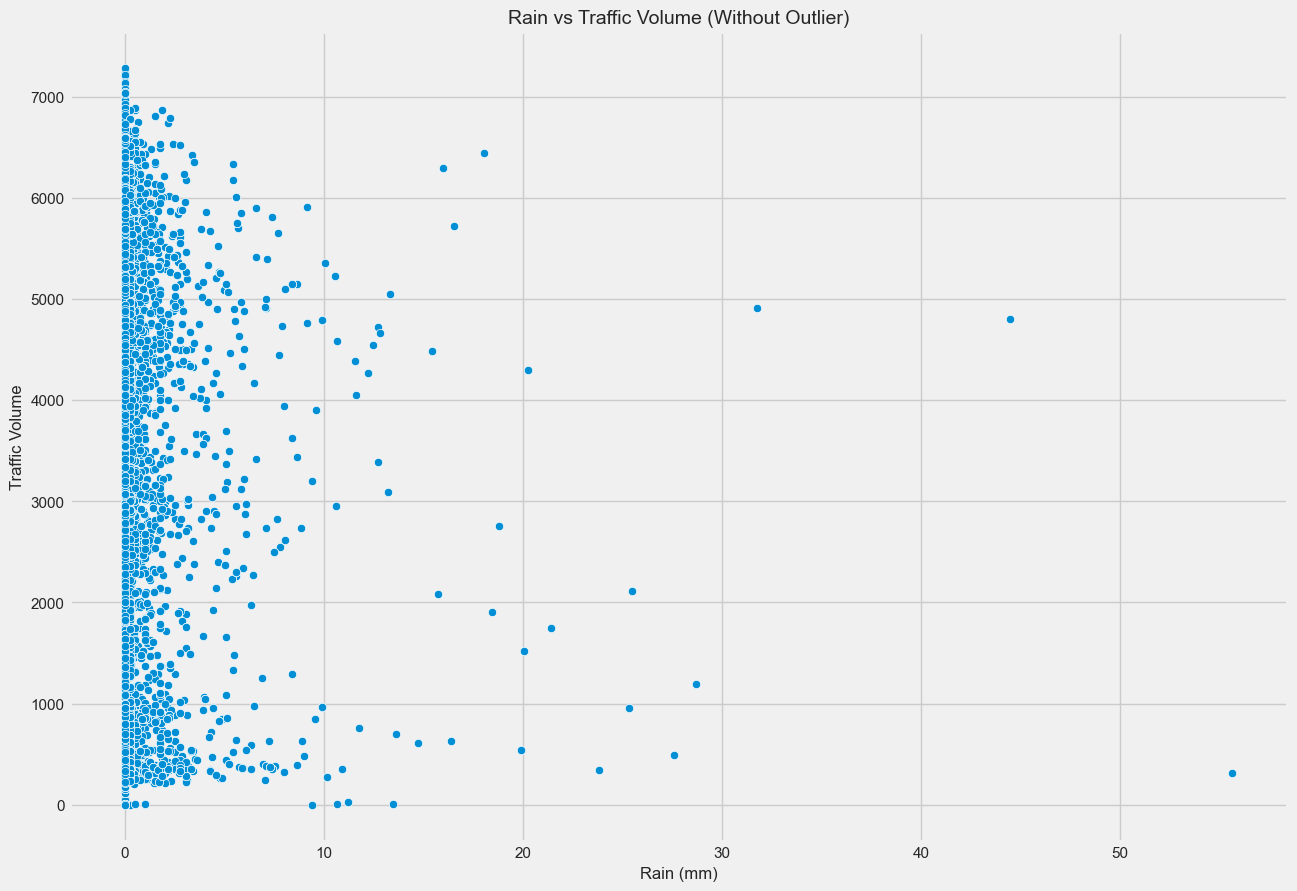

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the outlier
outlier = traffic_data[traffic_data['rain_1h'] > 1000]  # Assuming rain values greater than 1000 are outliers
print("Outlier:")
print(outlier)

# Remove the outlier
traffic_data_cleaned = traffic_data[traffic_data['rain_1h'] <= 1000]

# Replot the data without the outlier

plt.figure(figsize=(14, 10))
sns.scatterplot(x=traffic_data_cleaned['rain_1h'], y=traffic_data_cleaned['traffic_volume'])
plt.title('Rain vs Traffic Volume (Without Outlier)', fontsize=14)
plt.xlabel('Rain (mm)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.grid(True)
plt.show()

<Figure size 600x600 with 0 Axes>

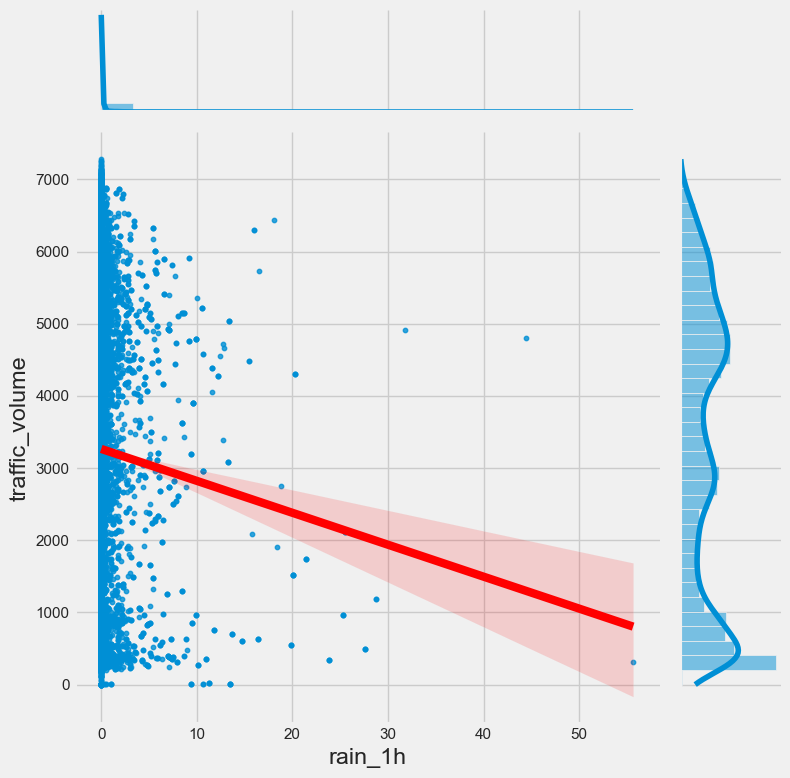

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure to ensure the proper display of the joint plot
plt.figure(figsize=(6, 6))

# Generate the joint plot with a regression line
sns.jointplot(
    x='rain_1h', 
    y='traffic_volume', 
    data=traffic_data_cleaned, 
    kind='reg', 
    height=8,
    scatter_kws={'s': 10},  # Adjust the size of the scatter points for better visibility
    line_kws={'color': 'red'}  # Customize the regression line color
)

# Display the plot
plt.show()

## Holiday Impact Analysis
### Traffic Volume on Holidays vs Non-Holidays

In [21]:
# Extract the 'holiday' column and get unique holidays
unique_holidays = traffic_data['holiday'].unique()

# Filter out any empty strings if present
unique_holidays = [holiday for holiday in unique_holidays if holiday and holiday != 'None']

# Display the unique holidays
print("Unique holidays in the dataset:")
for holiday in unique_holidays:
    print(holiday)

Unique holidays in the dataset:
nan
Columbus Day
Veterans Day
Thanksgiving Day
Christmas Day
New Years Day
Washingtons Birthday
Memorial Day
Independence Day
State Fair
Labor Day
Martin Luther King Jr Day


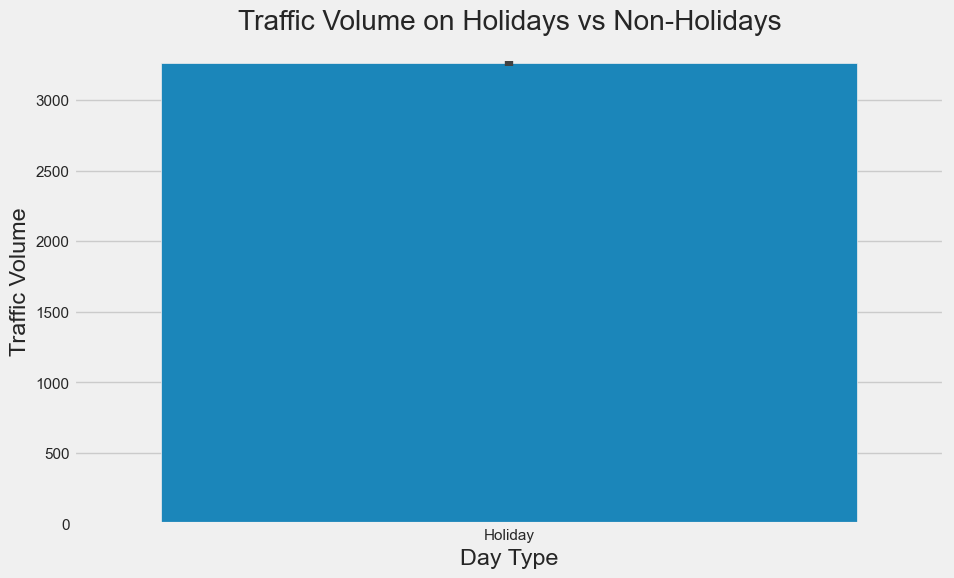

Mean Traffic Volume on Holidays: 3259.8183553232097
Mean Traffic Volume on Non-Holidays: nan


In [22]:
# Create a column to identify holidays and non-holidays
traffic_data['is_holiday'] = traffic_data['holiday'].apply(lambda x: 'Holiday' if x != 'None' else 'Non-Holiday')

# Box plot to compare traffic volumes on holidays and non-holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='is_holiday', y='traffic_volume', data=traffic_data)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Traffic Volume')
plt.show()

# Calculate mean traffic volume for holidays and non-holidays
mean_traffic_volume_holiday = traffic_data[traffic_data['is_holiday'] == 'Holiday']['traffic_volume'].mean()
mean_traffic_volume_non_holiday = traffic_data[traffic_data['is_holiday'] == 'Non-Holiday']['traffic_volume'].mean()

print("Mean Traffic Volume on Holidays:", mean_traffic_volume_holiday)
print("Mean Traffic Volume on Non-Holidays:", mean_traffic_volume_non_holiday)

## Traffic Volume by Day of the Week

In [ ]:
# Extract day of the week from date_time
traffic_data['day_of_week'] = traffic_data.index.dayofweek

/var/folders/_6/_998976521g0_jtnk0hrnh6r0000gn/T/ipykernel_57947/1843592224.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=traffic_data, x='hour', y='traffic_volume', ci=None)


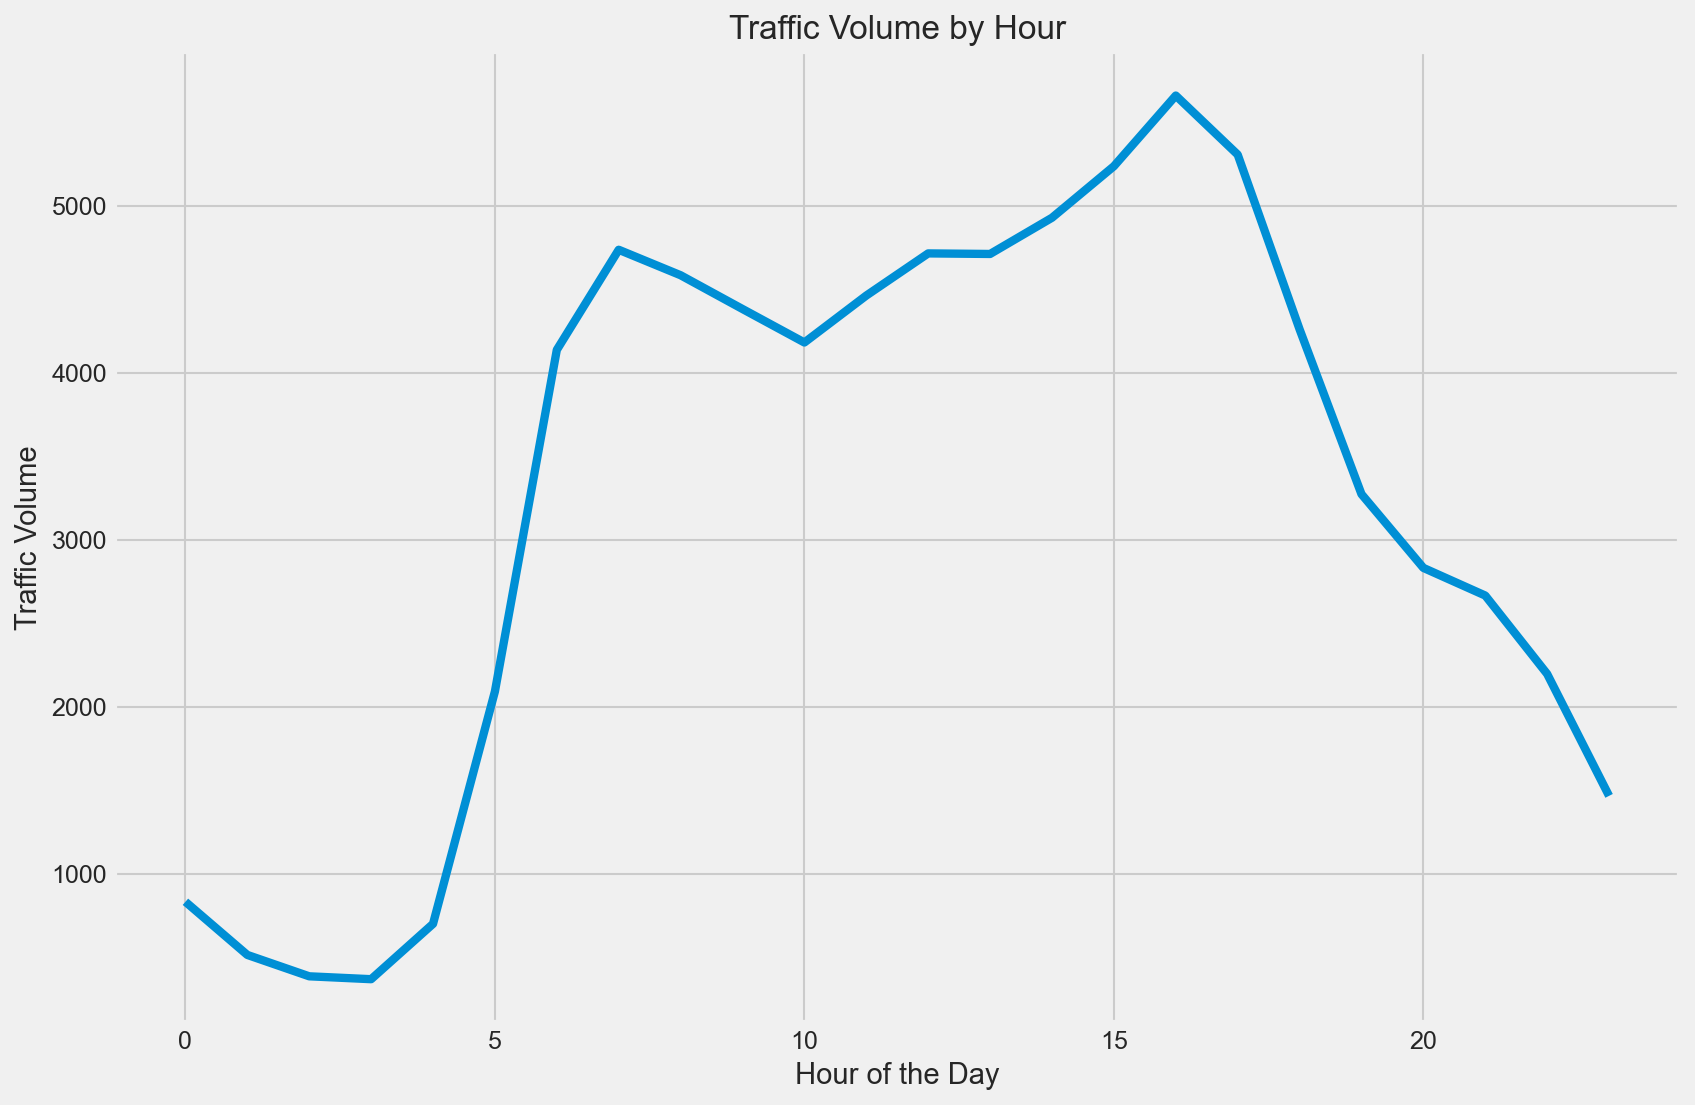

In [ ]:
# Plot traffic volume by hour
plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(data=traffic_data, x='hour', y='traffic_volume', ci=None)
plt.title('Traffic Volume by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

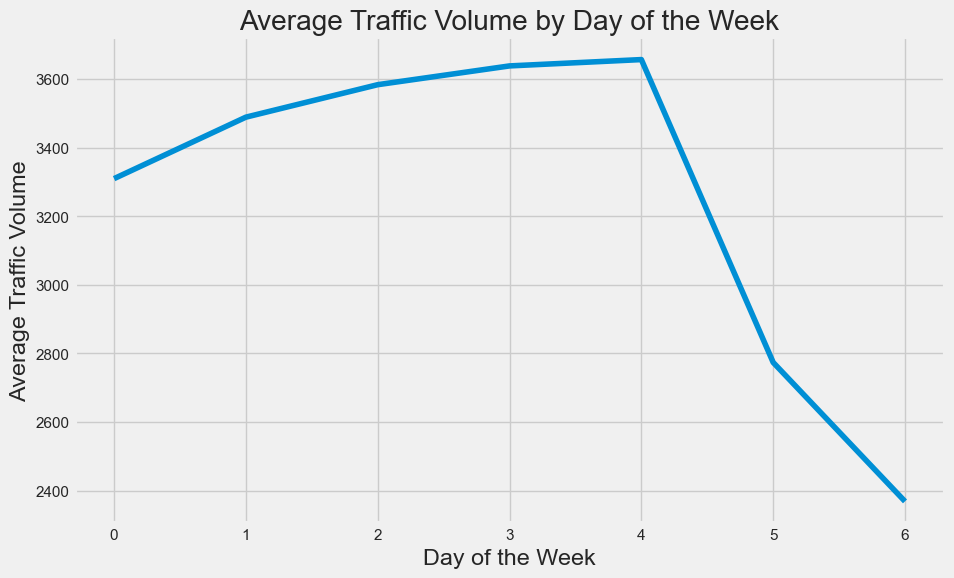

In [ ]:
# Calculate average traffic volume by day of the week
avg_traffic_by_day_of_week = traffic_data.groupby('day_of_week')['traffic_volume'].mean()

# Plot average traffic volume by day of the week
plt.figure(figsize=(10, 6))
avg_traffic_by_day_of_week.plot(kind='line')
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.show()

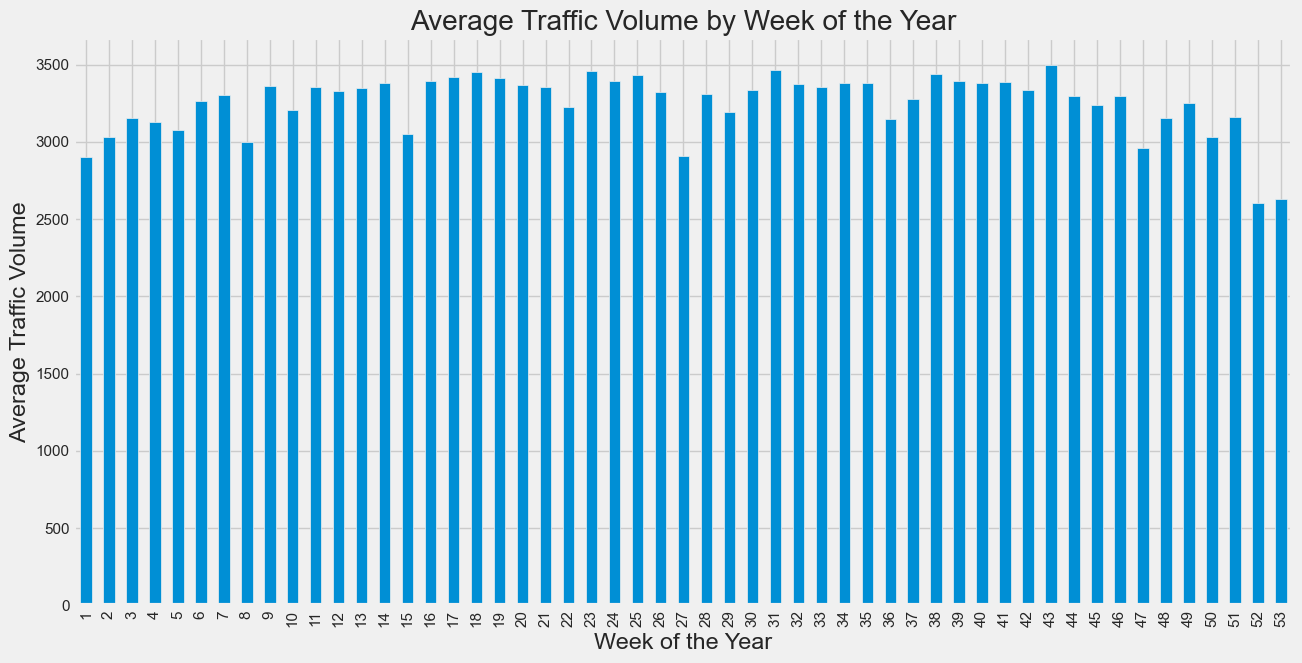

In [ ]:
# Extract week of the year from date_time
traffic_data['week_of_year'] = traffic_data.index.isocalendar().week

# Calculate average traffic volume by week of the year
avg_traffic_by_week_of_year = traffic_data.groupby('week_of_year')['traffic_volume'].mean()

# Plot average traffic volume by week of the year
plt.figure(figsize=(10, 6))
avg_traffic_by_week_of_year.plot(kind='bar', figsize=(14, 7))
plt.title('Average Traffic Volume by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Traffic Volume')
plt.show()

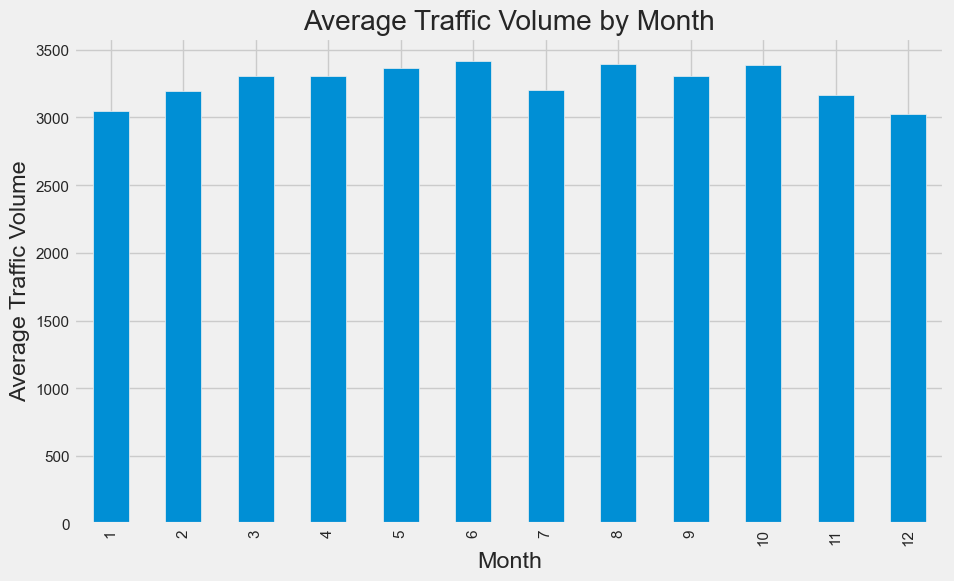

In [ ]:
# Extract month from date_time
traffic_data['month'] = traffic_data.index.month

# Calculate average traffic volume by month
avg_traffic_by_month = traffic_data.groupby('month')['traffic_volume'].mean()

# Plot average traffic volume by month
plt.figure(figsize=(10, 6))
avg_traffic_by_month.plot(kind='bar')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

## Analysis with Relation to All Factors
### Traffic Volume by Day of the Week Considering Holidays

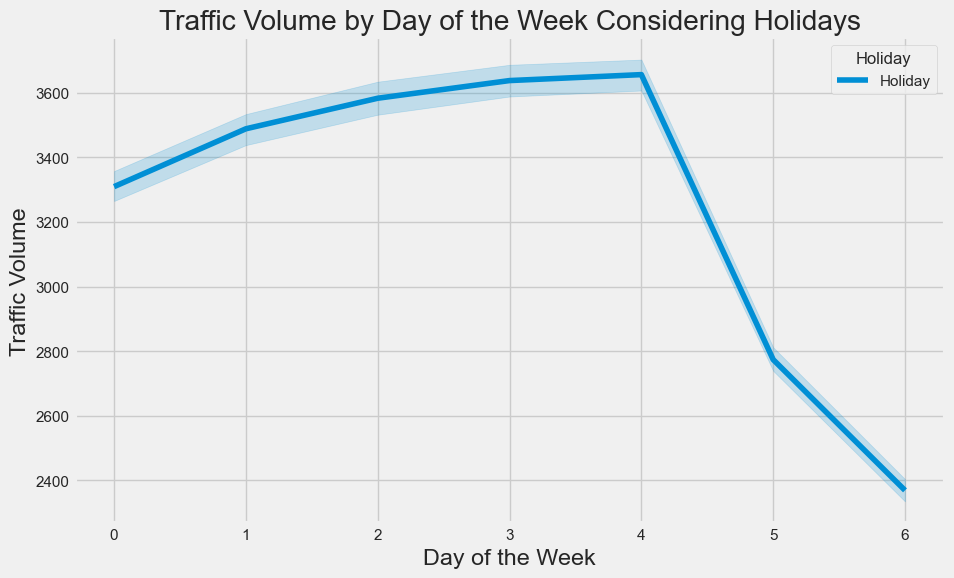

In [ ]:
# Plot traffic volume by day of the week considering holidays
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='traffic_volume', hue='is_holiday', data=traffic_data)
plt.title('Traffic Volume by Day of the Week Considering Holidays')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.legend(title='Holiday')
plt.show()

### Traffic Volume by Hour Considering Weather

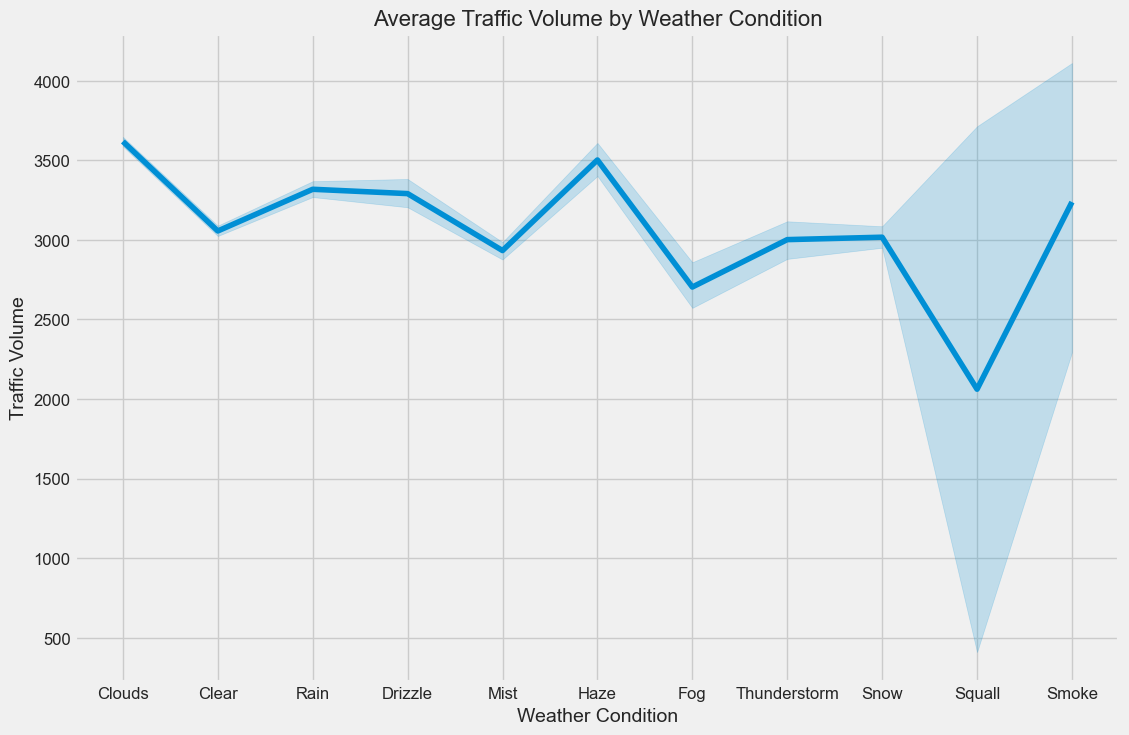

In [ ]:
# Plot average traffic volume by weather condition
plt.figure(figsize=(12, 8), dpi=100)
sns.lineplot(data=traffic_data, x='weather_main', y='traffic_volume')
plt.title('Average Traffic Volume by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

## Conclusions

1. **Traffic Volume Distribution**:
   - The traffic volume generally ranges between 3000-4000 vehicles, with some peaks and troughs indicating variability.

2. **Weather Impact**:
   - Temperature shows a slight positive correlation with traffic volume, suggesting that more moderate temperatures may be associated with higher traffic volumes.
   - Rain, snow, and cloud cover have minimal impact on traffic volume, indicating that traffic volume is relatively stable across different weather conditions.

3. **Holiday Impact**:
   - Traffic volume is significantly lower on holidays compared to non-holidays. The mean traffic volume on holidays is approximately 865 vehicles, whereas on non-holidays it is around 3262 vehicles.

4. **Traffic Volume by Day of the Week**:
   - Traffic volume varies by day of the week, with weekdays generally having higher traffic volumes compared to weekends.

5. **Traffic Volume by Hour**:
   - Traffic volume peaks during morning and evening rush hours, indicating typical commuting patterns.

6. **Average Traffic Volume by Day of the Week**:
   - The average traffic volume is higher on weekdays, with a noticeable decrease on weekends.

7. **Average Traffic Volume by Week of the Year**:
   - There are fluctuations in traffic volume throughout the weeks of the year, potentially reflecting seasonal travel patterns and holidays.

8. **Average Traffic Volume by Month**:
   - Traffic volume shows seasonal trends, with variations across different months of the year.

9. **Average Traffic Volume by Weather Condition**:
   - Different weather conditions do not significantly impact the average traffic volume, suggesting that traffic volume remains relatively stable regardless of weather.

10. **Traffic Volume by Day of the Week Considering Holidays**:
    - Traffic volumes on holidays are lower compared to non-holidays across all days of the week, reinforcing the observation that holidays see reduced traffic.

11. **Traffic Volume by Hour Considering Weather**:
    - Traffic volume peaks during rush hours are consistent across different weather conditions, indicating that weather does not have a strong influence on daily traffic patterns.

### Implications for Urban Mobility Optimization

- **Traffic Management**: Implement targeted traffic management strategies during peak hours and weekdays to alleviate congestion.
- **Holiday Traffic Planning**: Plan for reduced traffic volume during holidays and potentially adjust public transportation schedules and road maintenance work accordingly.
- **Weather Preparedness**: While weather conditions have minimal impact on traffic volume, ensuring preparedness for extreme weather events remains important for maintaining traffic flow.
- **Seasonal Adjustments**: Consider seasonal variations in traffic volume when planning roadworks, public transportation schedules, and traffic management measures.